In [1]:
import pandas as pd
from warnings import simplefilter

# Ignore all warnings
simplefilter(action='ignore')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from warnings import simplefilter
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv('C:/Users/nourb/Desktop/Projet BI/Fraud.csv')
df_equilibre = pd.read_csv('C:/Users/nourb/Desktop/Projet BI/Fraud.csv')

In [4]:
df.shape


(6362620, 11)

In [5]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Analysis and visualization**

In [6]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [9]:
#finding distribution on transaction types i.e "CASH_OUT" : 1,"PAYMENT" : 2,"CASH_IN" : 3,"TRANSFER" : 4,"DEBIT" : 5
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

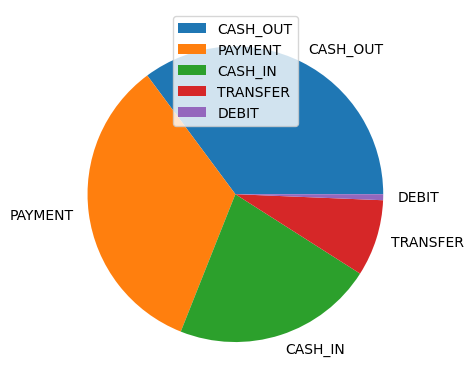

In [10]:
#ploting the transaction type for better visualization 
type = df['type'].value_counts()
transaction = ['CASH_OUT' ,'PAYMENT','CASH_IN','TRANSFER','DEBIT']
quantity = type.values
plt.pie(quantity,labels=transaction)
plt.legend()
plt.show()

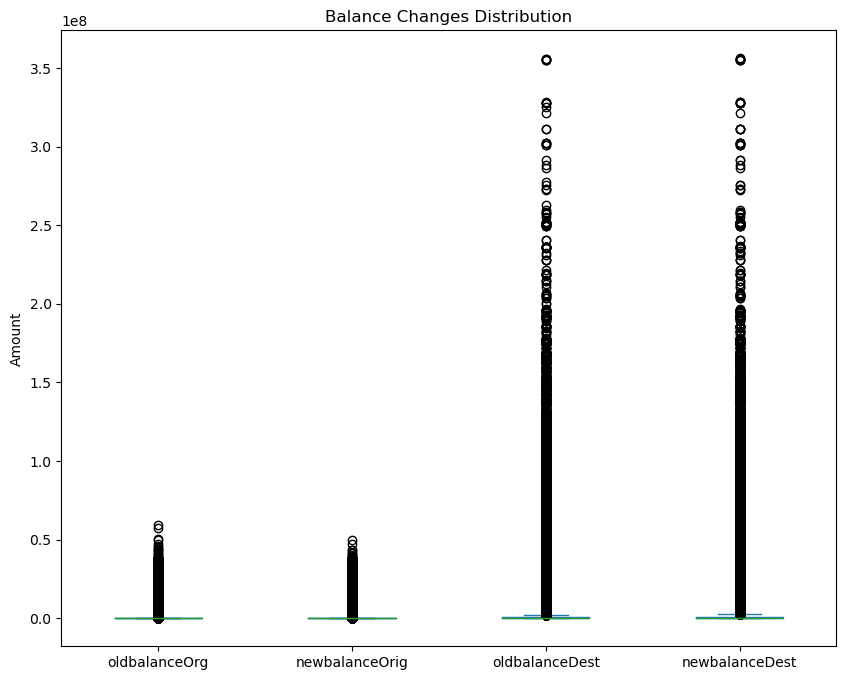

In [11]:
# Balance Changes
balance_changes = df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
balance_changes.plot(kind='box', figsize=(10, 8))
plt.title('Balance Changes Distribution')
plt.ylabel('Amount')
plt.show()

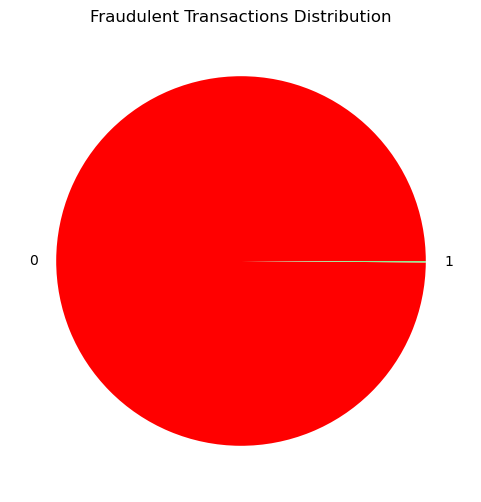

In [12]:
# Fraudulent Transactions
fraudulent_transactions = df['isFraud'].value_counts()
plt.figure(figsize=(6, 6))
fraudulent_transactions.plot(kind='pie', colors=['red', 'lightgreen'])
plt.title('Fraudulent Transactions Distribution')
plt.ylabel('')
plt.show()

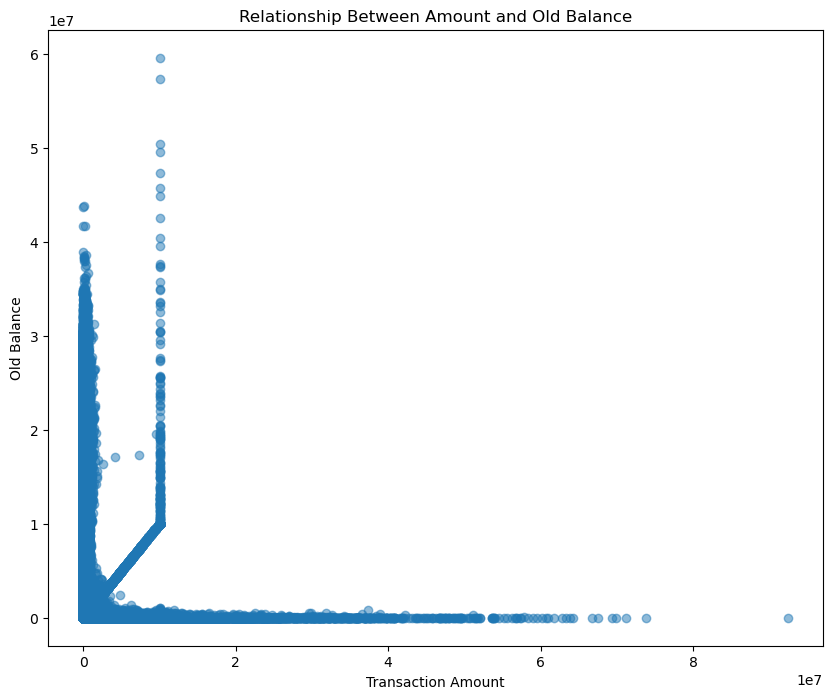

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(df['amount'], df['oldbalanceOrg'], alpha=0.5)
plt.title('Relationship Between Amount and Old Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance')
plt.show()

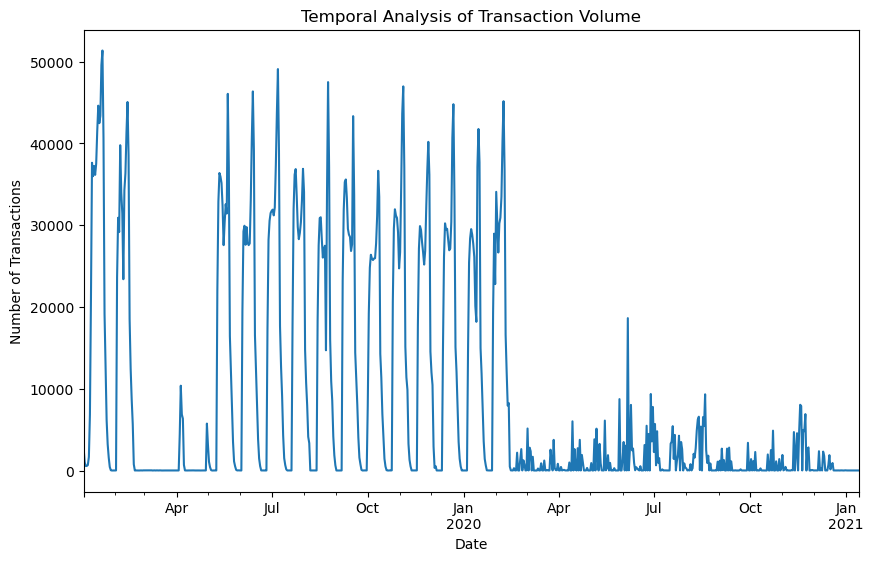

In [14]:
# Temporal Analysis
df['step_datetime'] = pd.to_datetime(df['step'], unit='D', origin='2019-01-01')  # Assuming step is days since 2019-01-01
plt.figure(figsize=(10, 6))
df.groupby('step_datetime').size().plot()
plt.title('Temporal Analysis of Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [15]:
#converts transaction type into numerical values for further processing and output varial in string form for better understanding
df['type']=df['type'].map({"CASH_OUT" : 1,"PAYMENT" : 2,"CASH_IN" : 3,"TRANSFER" : 4,"DEBIT" : 5})
df = df.drop(['nameOrig','nameDest'],axis=1) #as 'nameOrig','nameDest' are non numeriacal features hence remove it

In [16]:
#Converting the binary data type to string for better output understanding
df['isFraud']= df['isFraud'].map({0:'No fraud',1:'Fraud'})

In [17]:
#spliting the data into features and output variable
from sklearn.model_selection import train_test_split

x = np.array(df[["type","amount","oldbalanceOrg","newbalanceOrig"]])
#using only 4 feature as nameOrig and nameDest is categorical features and other having multi-colinearity 

y = np.array(df[["isFraud"]])

In [18]:
#for this type of prediction and classification in fraud or not fraud we 
#are going to use Decision Tree , as it captures complex realtion
#between features 

#traning a machine learning model using decision tree

from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9997100251154398

In [19]:
#prediction on new test data 
#features = ["type","amount","oldbalancOrg","newbalanceOrig"]
features = np.array([[1,9839.64,170136.0,160296.36]])
print(model.predict(features))

['No fraud']


In [20]:
#prediction on new test data 
#features = ["type","amount","oldbalancOrg","newbalanceOrig"]
features = np.array([[5,70000,70000,0]])
print(model.predict(features))

['Fraud']
